# Lab | Customer Analysis Final Round
## For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

## It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

### 01 - Problem (case study)
   ### Data Description.
   ### Goal.

### 02 - Getting Data
   ### Read the .csv file.

### 03 - Cleaning/Wrangling/EDA
   ### Change headers names.
### Deal with NaN values.
### Categorical Features.
### Numerical Features.
### Exploration.

### 04 - Processing Data
### Dealing with outliers.
### Normalization.
### Encoding Categorical Data.
### Splitting into train set and test set.

### 05 - Modeling
### Apply model.

### 06 - Model Validation
### R2.
### MSE.
### RMSE.
### MAE.

### 07 - Reporting
### Present results.

## 1.

Data Description.

Unnamed: Index
customer: Customer ID
state: US State
customer_lifetime_value: CLV is the client economic value for a company during all their relationship
response: Response to marketing calls (customer engagement)
coverage: Customer coverage type
education: Customer education level
effective_to_date: Effective to date
employmentstatus: Customer employment status
gender: Customer gender
income: Customer income
location_code: Customer living zone
marital_status: Customer marital status
monthly_premium_auto: Monthly premium
months_since_last_claim: Last customer claim
months_since_policy_inception: Policy Inception
number_of_open_complaints: Open claims
number_of_policies: Number policies
policy_type: Policy type
policy: Policy
renew_offer_type: Renew
sales_channel: Sales channel (customer-company first contact)
total_claim_amount: Claims amount
vehicle_class: Vehicle class
vehicle_size: Vehicle size
vehicle_type: Vehicle type

Goal

Can we predict the amount claimed by a client?

## 2.

In [32]:
import pandas as pd                                          
data=pd.read_csv('marketing_customer_analysis.csv')
data                      

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


## 3.

In [33]:
data.columns=[c.lower().replace(' ', '_') for c in data.columns]
data=data.drop(columns=['unnamed:_0', 'vehicle_type','customer','vehicle_size','effective_to_date'],axis=1)
data=data.dropna()
data

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,...,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,...,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car
6,California,5035.035257,No,Basic,Doctor,Employed,F,37405,Urban,Married,...,8.0,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,Arizona,2771.663013,No,Basic,College,Employed,M,59855,Suburban,Married,...,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car
10904,Nevada,19228.463620,No,Basic,High School or Below,Unemployed,M,0,Suburban,Single,...,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,...,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,...,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV


In [34]:
data.isnull().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
dtype: int64

In [35]:
data.dtypes

state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
dtype: object

In [41]:
data.describe(include='all')

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class
count,9134,9134.000000,9134,9134,9134,9134,9134,9134.000000,9134,9134,...,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134
unique,5,NaN,2,3,5,5,2,NaN,3,3,...,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6
top,California,NaN,No,Basic,Bachelor,Employed,F,NaN,Suburban,Married,...,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car
freq,3150,NaN,7826,5568,2748,5698,4658,NaN,5779,5298,...,NaN,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621
mean,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,37657.380009,NaN,NaN,...,15.097000,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN
std,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,30379.904734,NaN,NaN,...,10.073257,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN
min,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN
25%,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN
50%,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,33889.500000,NaN,NaN,...,14.000000,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN
75%,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,62320.000000,NaN,NaN,...,23.000000,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN


In [55]:
data_num= data.select_dtypes(exclude=["object"])
data_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107
...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996


In [39]:
data_cat= data_num= data.select_dtypes(include=["object"])
data_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car
6,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car
10904,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV
10906,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car
10907,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV


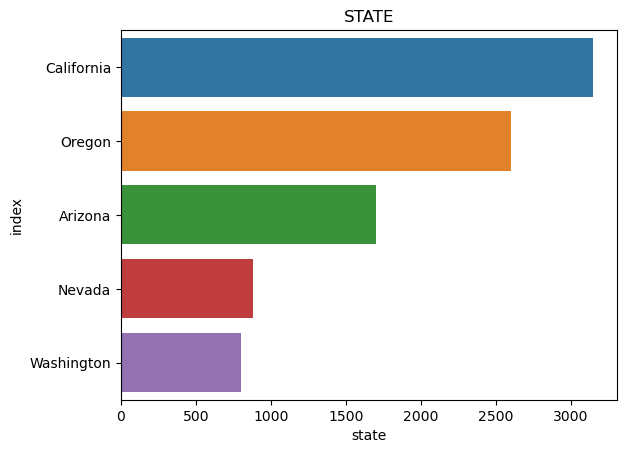

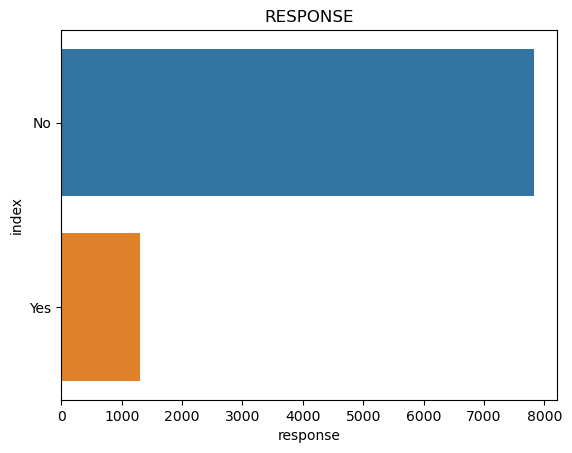

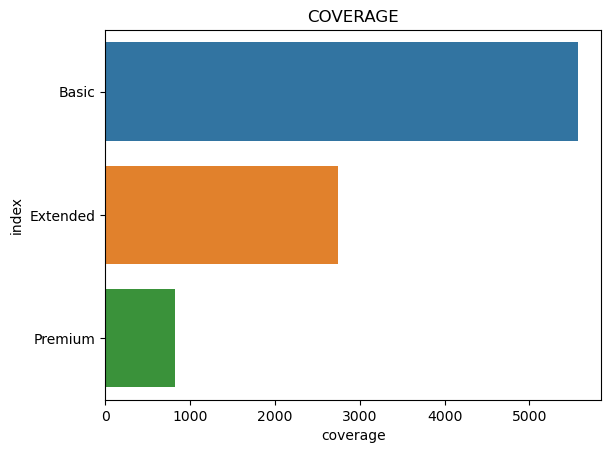

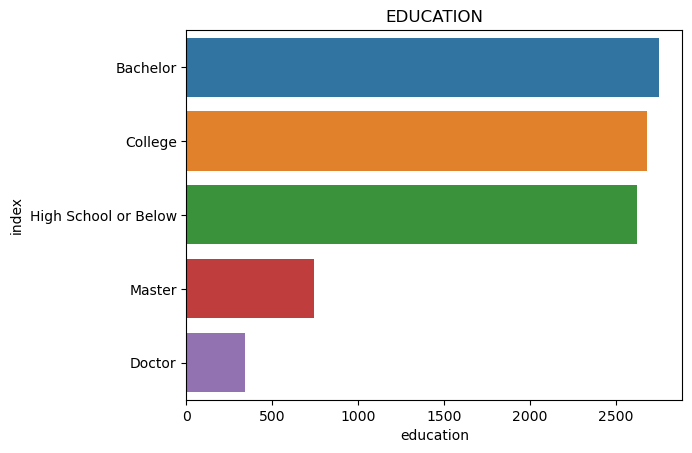

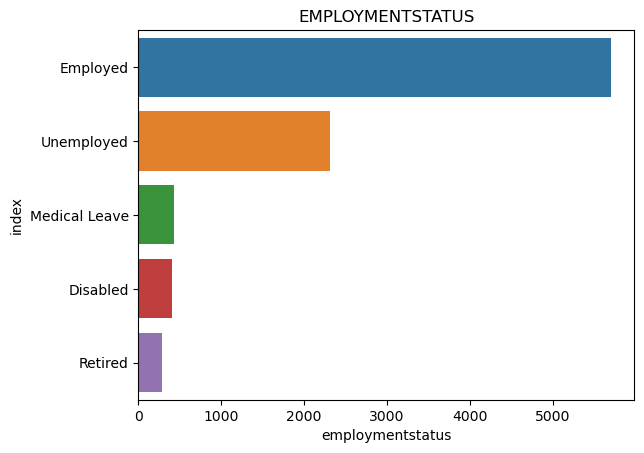

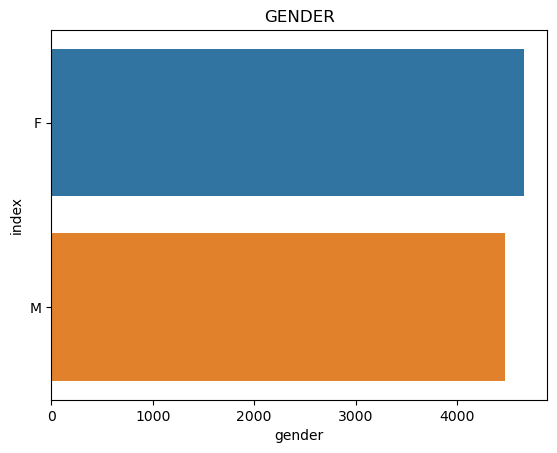

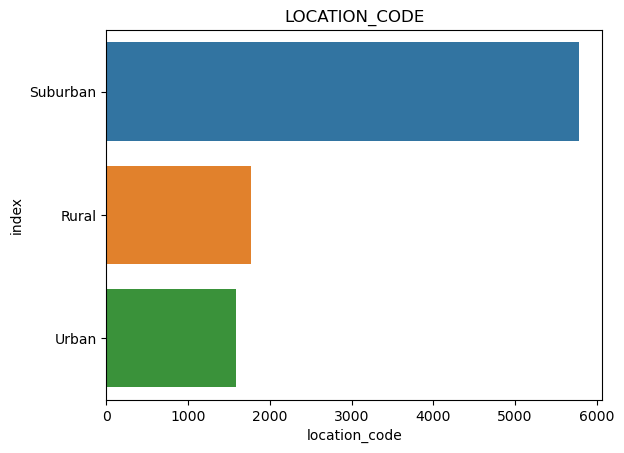

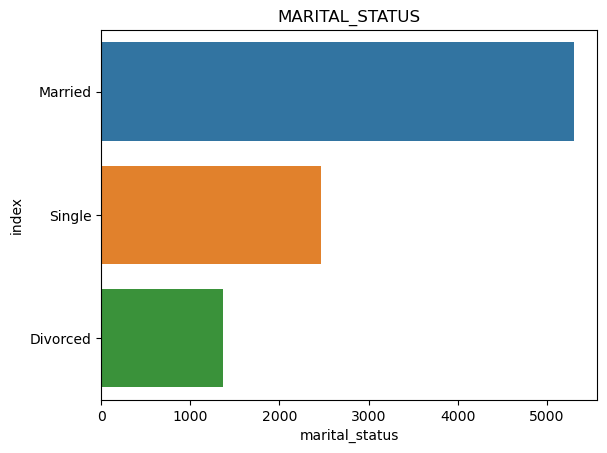

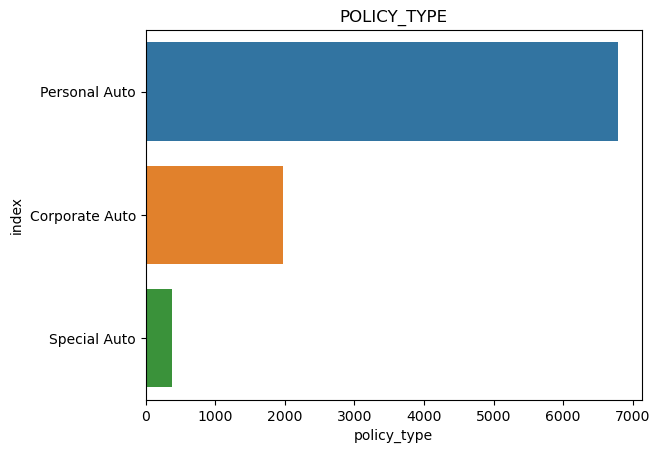

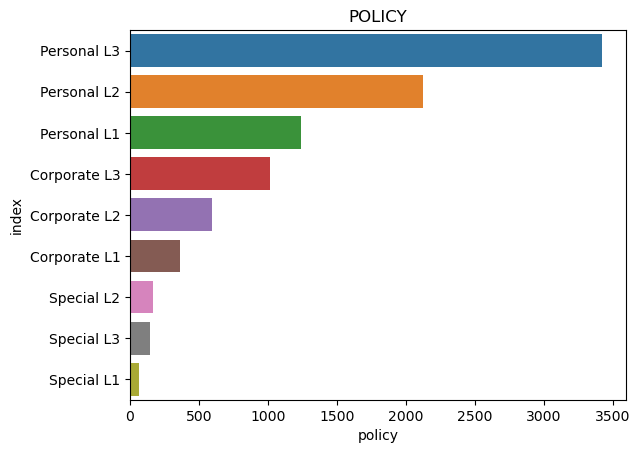

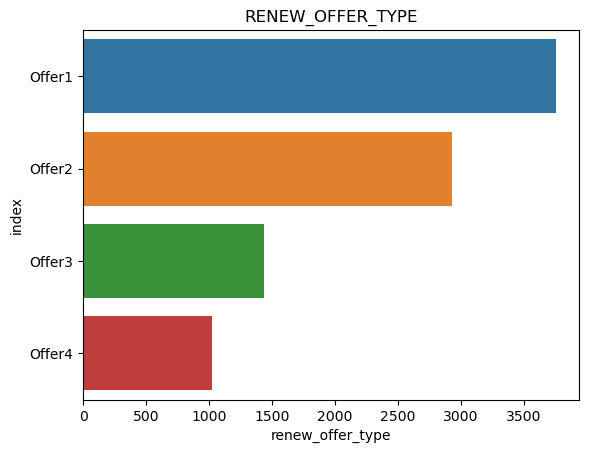

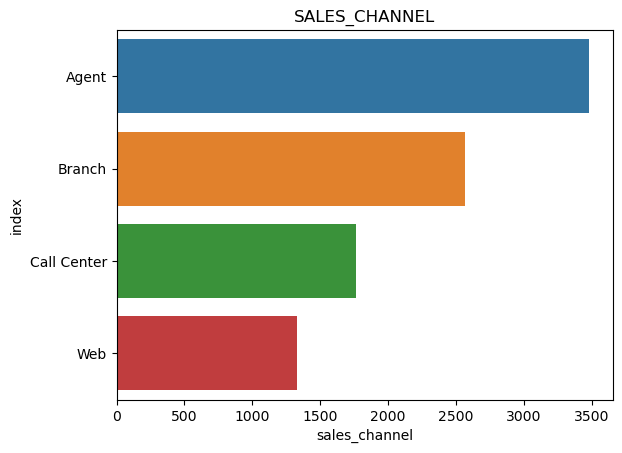

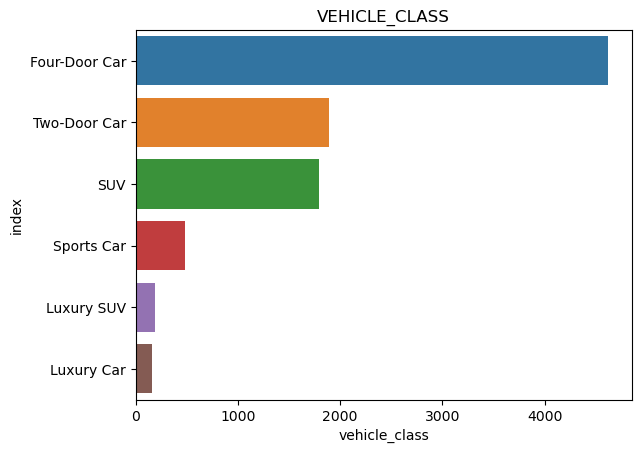

<Figure size 640x480 with 0 Axes>

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in data_cat:
    data_temp=data_cat[col].value_counts().reset_index()
    bar=sns.barplot(x=col, y='index', data=data_temp).set_title(col.upper())
    plt.figure()

## 4.

In [ ]:
#Conociendo outliers, reemplazandolos por nulos y eliminando los nulos por el promedio (mean)

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='customer_lifetime_value'>

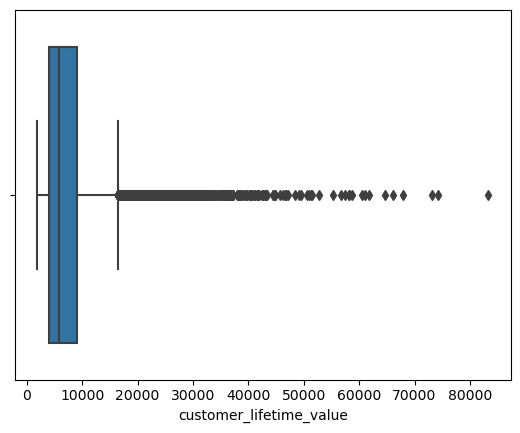

In [63]:
import seaborn as sns
sns.boxplot(data_num['customer_lifetime_value'])

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income'>

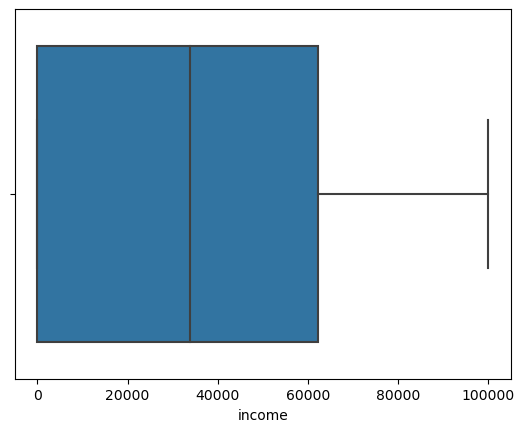

In [64]:
sns.boxplot(data_num['income'])

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='monthly_premium_auto'>

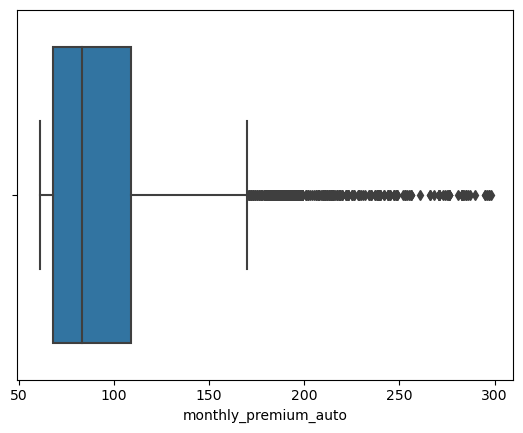

In [65]:
sns.boxplot(data_num['monthly_premium_auto'])

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='months_since_last_claim'>

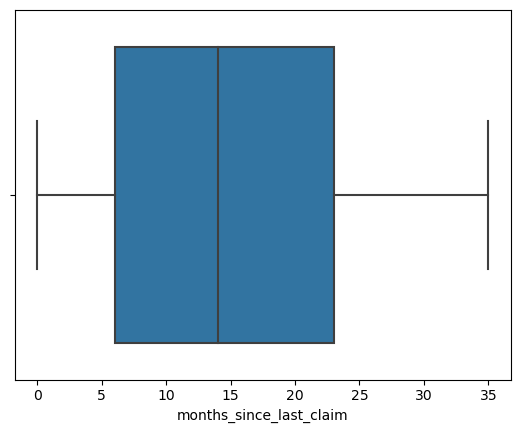

In [66]:
sns.boxplot(data_num['months_since_last_claim'])

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='months_since_policy_inception'>

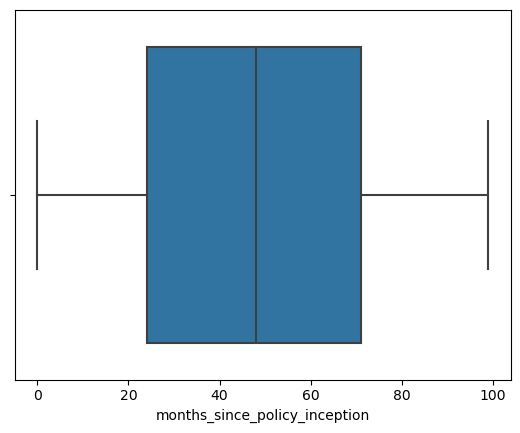

In [67]:
sns.boxplot(data_num['months_since_policy_inception'])

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_open_complaints'>

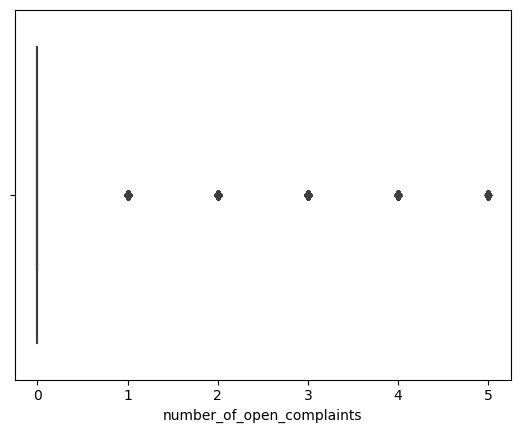

In [68]:
sns.boxplot(data_num['number_of_open_complaints'])

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_policies'>

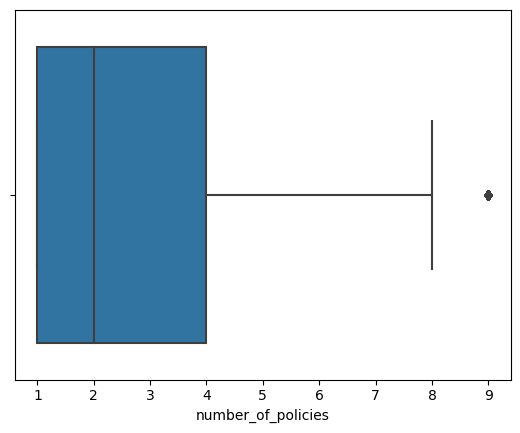

In [69]:
sns.boxplot(data_num['number_of_policies'])

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_claim_amount'>

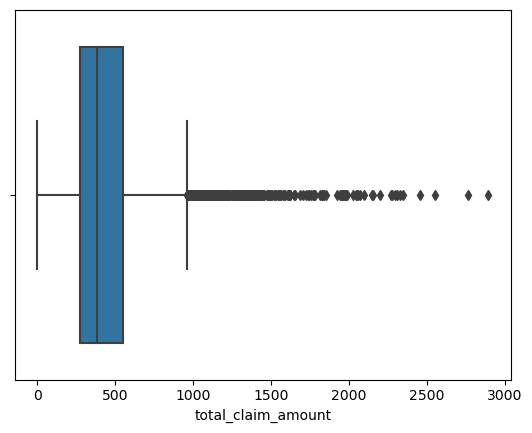

In [70]:
sns.boxplot(data_num['total_claim_amount'])

In [73]:
import numpy as np
for x in ['customer_lifetime_value']:
    q75,q25 = np.percentile(data_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data_num.loc[data_num[x] < min,x] = np.nan
    data_num.loc[data_num[x] > max,x] = np.nan

In [74]:
for x in ['monthly_premium_auto']:
    q75,q25 = np.percentile(data_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data_num.loc[data_num[x] < min,x] = np.nan
    data_num.loc[data_num[x] > max,x] = np.nan

In [75]:
for x in ['number_of_open_complaints']:
    q75,q25 = np.percentile(data_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data_num.loc[data_num[x] < min,x] = np.nan
    data_num.loc[data_num[x] > max,x] = np.nan

In [76]:
for x in ['number_of_policies']:
    q75,q25 = np.percentile(data_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data_num.loc[data_num[x] < min,x] = np.nan
    data_num.loc[data_num[x] > max,x] = np.nan

In [77]:
for x in ['total_claim_amount']:
    q75,q25 = np.percentile(data_num.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data_num.loc[data_num[x] < min,x] = np.nan
    data_num.loc[data_num[x] > max,x] = np.nan

In [78]:
data_num.isnull().sum()

customer_lifetime_value           817
income                              0
monthly_premium_auto              430
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints        1882
number_of_policies                416
total_claim_amount                453
dtype: int64

In [97]:
data_num['customer_lifetime_value']= data_num['customer_lifetime_value'].fillna(np.mean(data_num['customer_lifetime_value']))

data_num['monthly_premium_auto']= data_num['monthly_premium_auto'].fillna(np.mean(data_num['monthly_premium_auto']))

data_num['number_of_policies']= data_num['number_of_policies'].fillna(np.mean(data_num['number_of_policies']))

data_num['number_of_open_complaints']= data_num['number_of_open_complaints'].fillna(np.mean(data_num['number_of_open_complaints']))

data_num['total_claim_amount']= data_num['total_claim_amount'].fillna(np.mean(data_num['total_claim_amount']))

In [98]:
data_num.isnull().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [ ]:
#Normalizando nuestros valores numericos

In [99]:
X=data_num.drop(columns=['total_claim_amount'], axis=1)
y=data_num.total_claim_amount

In [100]:
from sklearn.preprocessing import Normalizer
transformer=Normalizer().fit(X)
x_norm=transformer.transform(X)
x_norm=pd.DataFrame(x_norm)

In [ ]:
#Aplicando OneHotEncoder a la data categorica

In [101]:
X_cat=data_cat= data_num= data.select_dtypes(include=["object"])

In [102]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first').fit(X_cat)
encoder=encoder.transform(X_cat).toarray()
encoder

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [103]:
#Haciendo el split de los valores numericos primero
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

## 5.

In [105]:
#Modelamos regresion lineal
from sklearn import linear_model
lm=linear_model.LinearRegression()

## 6.

In [124]:
#Intentamos con X_train
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
model=lm.fit(X_train,y_train)
predictions=lm.predict(X_test)
r2_score(y_test,predictions)

0.28713196372451333

In [125]:
mse=mean_squared_error(y_test,predictions)
mae = mean_absolute_error(y_test,predictions)
rmse = sqrt(mse)

print(mse)
print(mae)
print(rmse)

30716.967749990665
132.13321520538682
175.2625680229257


In [ ]:
#R2 muy bajo probaremos con X_test

In [118]:
model=lm.fit(X_test,y_test)
predictions=lm.predict(X_train)
r2_score(y_train,predictions)

0.2811604261256545

In [122]:
mse=mean_squared_error(y_train,predictions)
mae = mean_absolute_error(y_train,predictions)
rmse = sqrt(mse)

print(mse)
print(mae)
print(rmse)

30330.301801567563
131.00571118973588
174.15596975575534


In [ ]:
#R2 con X_test y X_train con valores muy similares, probaremos concatenando categoricos y numericos

In [139]:
Xc_train,Xc_test,y_train,y_test=train_test_split(Xc,y,test_size=0.2,random_state=5)

In [140]:
Xc=np.concatenate((x_norm,encoder),axis=1)
Xc

array([[0.09963315, 0.99502284, 0.00126374, ..., 0.        , 0.        ,
        0.        ],
       [0.9995189 , 0.        , 0.02870473, ..., 0.        , 0.        ,
        0.        ],
       [0.55957334, 0.82877059, 0.00374349, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.085698  , 0.99631997, 0.00105912, ..., 0.        , 0.        ,
        0.        ],
       [0.15569891, 0.9878009 , 0.00217193, ..., 0.        , 0.        ,
        0.        ],
       [0.18333246, 0.9830479 , 0.00241953, ..., 1.        , 0.        ,
        0.        ]])

In [141]:
model=lm.fit(Xc_train,y_train)
predictions=lm.predict(Xc_test)
r2_score(y_test,predictions)

0.6673586346189364

In [142]:
mse=mean_squared_error(y_test,predictions)
mae = mean_absolute_error(y_test,predictions)
rmse = sqrt(mse)

print(mse)
print(mae)
print(rmse)

14333.275687471514
87.7388296453026
119.72165922451758


In [ ]:
#Concatenando la data, el R2 subio considerablemente usando Xc_train

In [143]:
model=lm.fit(Xc_test,y_test)
predictions=lm.predict(Xc_train)
r2_score(y_train,predictions)

0.6566539386724186

In [144]:
mse=mean_squared_error(y_train,predictions)
mae = mean_absolute_error(y_train,predictions)
rmse = sqrt(mse)

print(mse)
print(mae)
print(rmse)

14486.94540607668
88.22027413609557
120.36172733089485


## 7.

In [ ]:
#Concluimos que al concatenar la data, nuestro modelo se acerca mas a una regresion lineal (R2>.6)